# Author : ATANU DAS
Email -atanu.das1729@gmail.com

# Store Sales Forecasting

# Problem:
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

# Aim:
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.



# Plan:
Understanding, Cleaning and Exploring Data

Preparing Data to Modeling

Random Forest Regressor

## Import libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

## Load the given datasets

In [43]:
sale = pd.read_csv(r"D:\Loyalytics Dataset\Dataset\sales data-set.csv")
store = pd.read_csv(r"D:\Loyalytics Dataset\Dataset\stores data-set.csv")
feature = pd.read_csv(r"D:\Loyalytics Dataset\Dataset\Features data set.csv")

In [44]:
sale["Date"] = pd.to_datetime(sale["Date"],dayfirst = True) # changing "Date" column in sale datatype to datetime
feature["Date"] = pd.to_datetime(feature["Date"],dayfirst = True) #changing "Date" column in sale datatype to datetime

In [45]:
feature['CPI'].fillna(feature['CPI'].median(), inplace = True) #fill NA CPI value using median of other CPI values
feature['Unemployment'].fillna(feature['Unemployment'].median(), inplace = True) #fill NA unemployment value using median of other Unemployment values
feature.fillna(0,inplace=True) #fill 0 inplace of NA in markdown columns

## Merging of Data

In [46]:
feature_store = feature.merge(store, how='inner', on = "Store")

In [47]:
train_data = sale.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [85]:
train_data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Size,Day,Week,Month,Year,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,151315,5,5,2,2010,1,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,211.242170,8.106,151315,12,6,2,2010,1,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,211.289143,8.106,151315,19,7,2,2010,1,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,211.319643,8.106,151315,26,8,2,2010,1,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,211.350143,8.106,151315,5,9,3,2010,1,0,0
5,1,1,2010-03-12,21043.39,0,57.79,2.667,0.0,0.0,0.0,...,211.380643,8.106,151315,12,10,3,2010,1,0,0
6,1,1,2010-03-19,22136.64,0,54.58,2.720,0.0,0.0,0.0,...,211.215635,8.106,151315,19,11,3,2010,1,0,0
7,1,1,2010-03-26,26229.21,0,51.45,2.732,0.0,0.0,0.0,...,211.018042,8.106,151315,26,12,3,2010,1,0,0
8,1,1,2010-04-02,57258.43,0,62.27,2.719,0.0,0.0,0.0,...,210.820450,7.808,151315,2,13,4,2010,1,0,0
9,1,1,2010-04-09,42960.91,0,65.86,2.770,0.0,0.0,0.0,...,210.622857,7.808,151315,9,14,4,2010,1,0,0


In [ ]:
avg monthly sale
select avg(Week_sales) as avg_monthly sale
from train_data
group by month;

In [89]:
train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Day', 'Week', 'Month',
       'Year', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [87]:
train_data.groupby("Month")["Weekly_Sales"].sum()

Month
1     3.325984e+08
2     5.687279e+08
3     5.927859e+08
4     6.468598e+08
5     5.571256e+08
6     6.226299e+08
7     6.500010e+08
8     6.130902e+08
9     5.787612e+08
10    5.847848e+08
11    4.130157e+08
12    5.768386e+08
Name: Weekly_Sales, dtype: float64

In [48]:
trained_data = train_data.copy()

In [49]:
test_sale = pd.read_csv(r"D:\Loyalytics_test.csv\test.csv")
test_sale["Date"]=pd.to_datetime(test_sale["Date"])


In [50]:
test_sale.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [51]:
test_data = test_sale.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [52]:
test_data.head(5)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [53]:
tested_data =test_data.copy()

In [54]:
#creating new columns from "Date" column
train_data['Day'] = train_data['Date'].dt.day 
train_data['Week'] = train_data['Date'].dt.isocalendar().week
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

test_data['Day'] = test_data['Date'].dt.day 
test_data['Week'] = test_data['Date'].dt.isocalendar().week
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year

In [55]:
typecounts = store.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Percentage of Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [56]:
store_sale = sale.merge(store ,on = 'Store',how='inner').merge(feature,)
avgweeklysales = store_sale.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Avergae Sales - Per Store",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

Text(0.5, 1.0, 'Weekly Sales over the time')

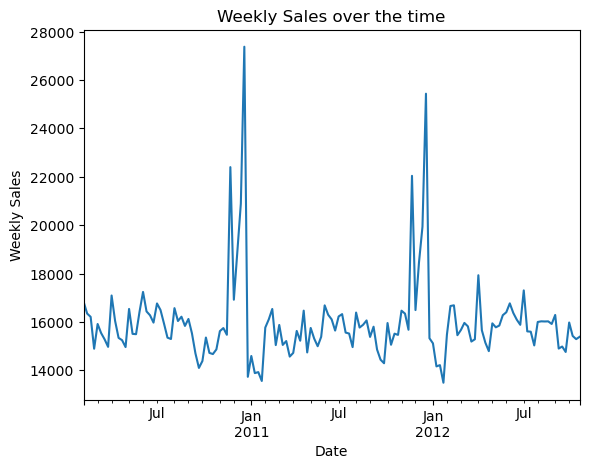

In [57]:
sale.groupby("Date")["Weekly_Sales"].mean().plot()
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales over the time")

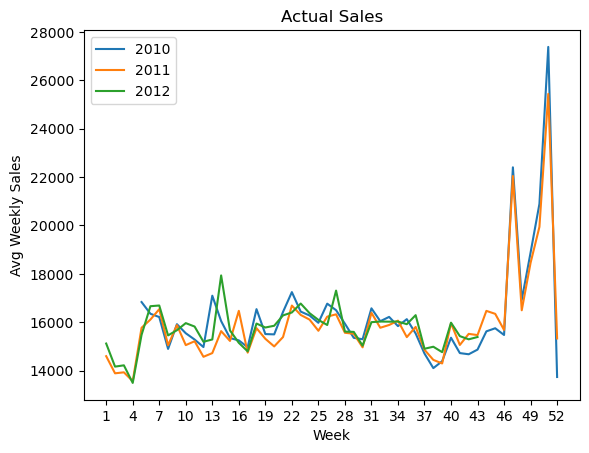

In [58]:
plt.plot(train_data[train_data["Year"]==2010].groupby("Week")["Weekly_Sales"].mean())
plt.plot(train_data[train_data["Year"]==2011].groupby("Week")["Weekly_Sales"].mean())
plt.plot(train_data[train_data["Year"]==2012].groupby("Week")["Weekly_Sales"].mean())
plt.xlabel('Week')
plt.ylabel('Avg Weekly Sales')
plt.xticks(np.arange(1,53,3))
plt.title("Actual Sales")
plt.legend(["2010","2011","2012"])
plt.show()


In [59]:
def avg_sales_plot(str):
    plt.figure(figsize=(17,5))
    store_sale.groupby(str)['Weekly_Sales'].mean().sort_values().plot(kind='bar',cmap='summer')
    plt.title(f'Average weekly sales of the company in each {str}',fontsize=15)
    plt.xlabel(xlabel=str,fontsize=15)
    plt.ylabel(ylabel='Sales',fontsize=15)
    plt.tick_params(axis='x',labelsize=10)
   

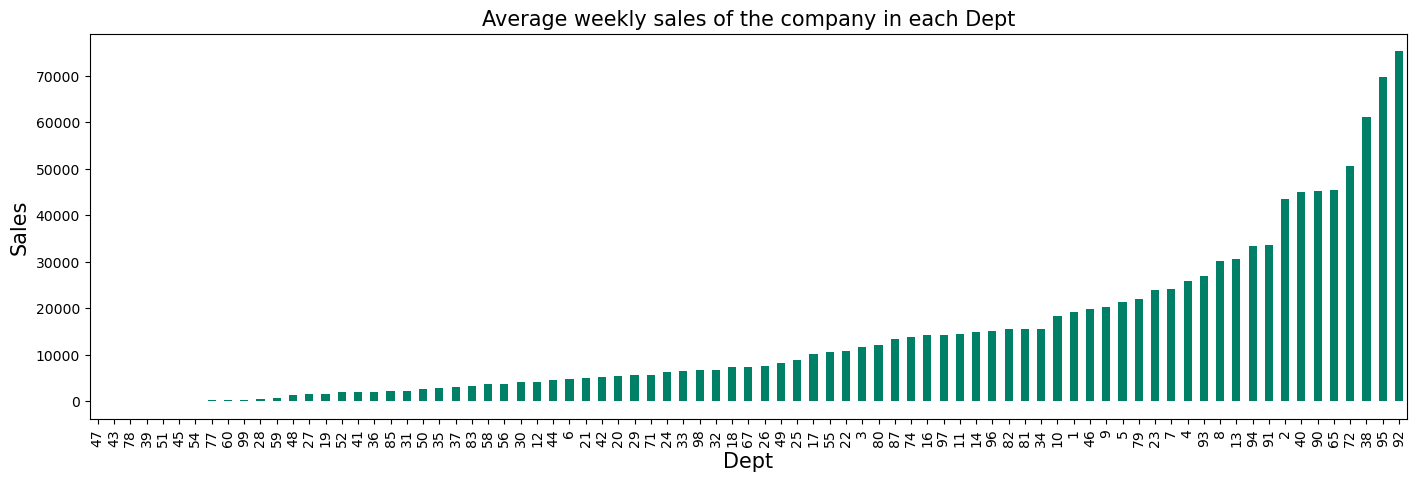

In [60]:
avg_sales_plot('Dept')

In [61]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

holiday_sales = train_data.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = train_data.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()


In [62]:
# encoding categorical variable using one hot encoding
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [63]:
train_data['IsHoliday'] = train_data['IsHoliday'].apply(lambda x: 1 if x == True else 0)
test_data['IsHoliday'] = test_data['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5,random_state=10)

In [65]:
print(list(train_data.columns).index("Date"))
print(list(train_data.columns).index("Weekly_Sales"))

2
3


In [66]:
#dividing input and target columns
X=train_data.drop(train_data.iloc[:,[2,3]],axis=1)
Y=train_data.iloc[:,3]

In [67]:
from sklearn import model_selection
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, Y , random_state=0, test_size=0.25)

In [68]:
#fit a Random Forest regressor model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=10)

In [69]:
y_valid_pred=rf.predict(X_valid)

In [70]:
rf_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

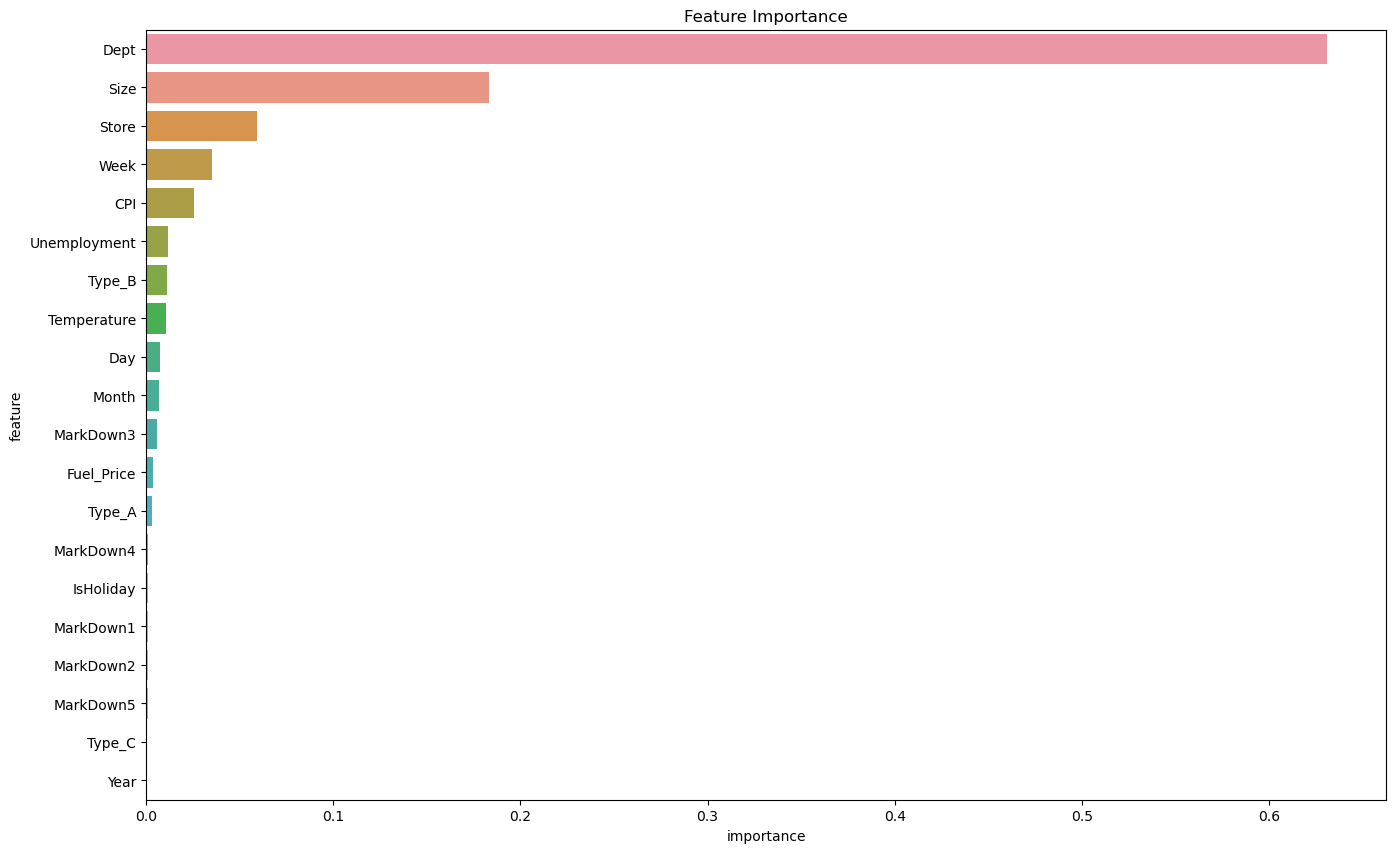

In [71]:
plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=rf_importance_df, x='importance', y='feature');

In [72]:
y_valid_pred=rf.predict(X_valid)
print("Score={}".format(rf.score(X_valid,y_valid)))
rmse = np.sqrt(np.mean((y_valid - rf.predict(X_valid) )**2))
print("Root mean Square = {}".format(rmse))


Score=0.9736955059217892
Root mean Square = 3680.6794834608972


In [73]:
x_train = train_data.loc[:,["Dept","Size","Store","Week","CPI"]]

## Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression().fit(X_train,y_train)

val_pred = model.predict(X_valid)
# Generate predictions on training data

model.score(X_valid,y_valid)
rmse_linear = np.sqrt(np.mean((y_valid - model.predict(X_valid) )**2))
rmse_linear

21626.676621674647

## Random Forest

In [75]:

rf1 = RandomForestRegressor(n_estimators=5,random_state=10)
rf1.fit(x_train,Y)


RandomForestRegressor(n_estimators=5, random_state=10)

In [76]:
X_test = test_data.loc[:,["Dept","Size","Store","Week","CPI"]]
rf1.predict(X_test)
prediction = pd.DataFrame(test_data.iloc[:,[0,1,2,11,13,17,15]])


In [77]:
rf1.predict(X_test)


array([25396.122, 20363.01 , 20599.12 , ...,   148.84 ,   148.84 ,
         148.84 ])

In [78]:
prediction = pd.DataFrame(test_data.iloc[:,[0,1,2,11,13,17,15]])

In [79]:
prediction["Weekly_Sales_predicted"] = rf1.predict(X_test)

In [80]:
prediction

,Store,Dept,Date,CPI,Size,Year,Week,Weekly_Sales_predicted
0,1,1,2012-11-02,223.462779,151315,2012,44,25396.122
1,1,1,2012-11-09,223.481307,151315,2012,45,20363.010
2,1,1,2012-11-16,223.512911,151315,2012,46,20599.120
3,1,1,2012-11-23,223.561947,151315,2012,47,21919.910
4,1,1,2012-11-30,223.610984,151315,2012,48,26340.790
...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,182.764003,118221,2013,26,148.840
115060,45,98,2013-07-05,182.764003,118221,2013,27,148.840
115061,45,98,2013-07-12,182.764003,118221,2013,28,148.840
115062,45,98,2013-07-19,182.764003,118221,2013,29,148.840


In [81]:
df = sale.loc[:,["Date","Weekly_Sales"]]
df1=pd.merge(df,prediction.iloc[:,[2,7]],on="Date",how="outer")

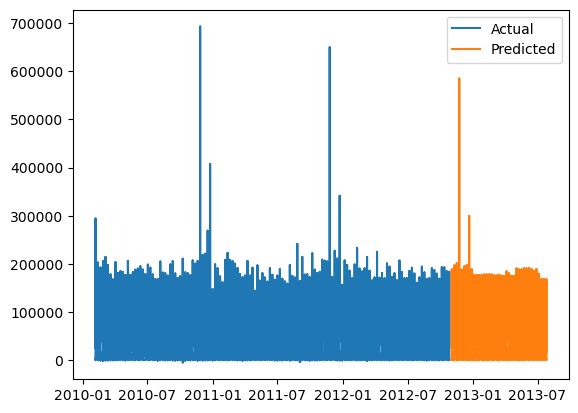

In [82]:
plt.plot(df1[df1["Weekly_Sales"].notna()]["Date"],df1[df1["Weekly_Sales"].notna()]["Weekly_Sales"])
plt.plot(df1[df1["Weekly_Sales"].isna()]["Date"],df1[df1["Weekly_Sales"].isna()]["Weekly_Sales_predicted"])
plt.legend(["Actual","Predicted"])
plt.show()